# Chapter 7. Modern CNNs
- CNN ImageNet Competiton(2010 ~ )에서 많은 우수한 성과를 거두면서 인기를 누림
  - AlexNet
    - Large scale network
  - VGG
    - Repeating blocks of elements
  - NiN
    - Conv + Linear로 구성된 Block을 겹겹히 쌓은 구조
  - GoogLeNet
    - Parallel Concatenation
  - ResNet
    - Residual Connection
  - DenseNet 
    - Heavy to compute / Good Perf.
    
## Deep CNN (AlexNet)
- LeNet이 CNN을 알리는데에는 큰 역할을 했으나..
- 그럼에도 불고하고 다른 ML들(SVM 등)이 보다 높은 효율성을 보여 NN기술은 널리 보급되지 않음
- 하지만 Computer Vision 영역의 경우 이전 방법론은 많은 Manual Feature 추출 알고리즘에 의존했음
- 90년대 제한적인 가속기가 있었으나 Multi Layer / Multi Channel CNN을 다루기엔 불충분
- 또한 Neural Net의 주요 Trick들 SGD, Activation 함수, Paramter Init 등이 나오기 이전의 상태

### Learning Representaion
- 당시 Computer Vision 연구자들은 Learning Algorithm 자체보다 Feature의 추출이 결과에 훨씬 중요하다는 믿음을 가지고 있었음
- 반면 몇몇 연구자들은 이러한 Feature 자체도 Training 과정을 통해 학습될 수 있다고 믿었음
### Invention of AlexNet
- 2012년 ImageNet Challenge에서 최고 수준의 성능
- 가장 앞단의 Input Layer들은 일부 기존의 Craft 된 Feature Extractor와 매우 유사함이 발견됨
- 뒷단의 CNN Layer로 갈수록 보다 상위 개념들 (예를 들어 눈, 코, 입 -> 얼굴 -> 사람)의 표현들을 갖게됨
- 이러한 성과의 배경에는
  - Data 
    - ImageNet Dataset 공개 (@ '09)
  - Hardware 
    - 당시 Major Bottleneck이던 Convolution과 MatMul이 GPU를 통해 병렬 처리될 수 있음을 착안
    - 2 x NVIDIA 580 (3GB)를 이용
- Architecture
  - LeNet 보다 심층화된 CNN Layers
  - Relu의 사용 : 보다 단순호된 Activation
  - Regularization
    - Data Augmentation 
    - Dropout의 사용
   
    
  


  


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),  # 3 x 224 x 224  -> 288 x 54 x 54
    nn.MaxPool2d(kernel_size=3, stride=2),    # 288 x 54 x 54 -> 288 x 26 x 26                   
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),    # 288 x 26 x 26 -> 768 x 26 x 26
    nn.MaxPool2d(kernel_size=3, stride=2),                      # 768 x 26 x 26 -> 
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,10))
X = torch.rand(size=(1,1,224,224))

for layer in net:
    X = layer(X)
    print(f'{layer.__class__.__name__} output shape : \t{X.shape}')

Conv2d output shape : 	torch.Size([1, 96, 54, 54])
ReLU output shape : 	torch.Size([1, 96, 54, 54])
MaxPool2d output shape : 	torch.Size([1, 96, 26, 26])
Conv2d output shape : 	torch.Size([1, 256, 26, 26])
ReLU output shape : 	torch.Size([1, 256, 26, 26])
MaxPool2d output shape : 	torch.Size([1, 256, 12, 12])
Conv2d output shape : 	torch.Size([1, 384, 12, 12])
ReLU output shape : 	torch.Size([1, 384, 12, 12])
Conv2d output shape : 	torch.Size([1, 384, 12, 12])
ReLU output shape : 	torch.Size([1, 384, 12, 12])
Conv2d output shape : 	torch.Size([1, 256, 12, 12])
ReLU output shape : 	torch.Size([1, 256, 12, 12])
MaxPool2d output shape : 	torch.Size([1, 256, 5, 5])
Flatten output shape : 	torch.Size([1, 6400])
Linear output shape : 	torch.Size([1, 4096])
ReLU output shape : 	torch.Size([1, 4096])
Dropout output shape : 	torch.Size([1, 4096])
Linear output shape : 	torch.Size([1, 4096])
ReLU output shape : 	torch.Size([1, 4096])
Dropout output shape : 	torch.Size([1, 4096])
Linear output sh

In [3]:
batch_size = 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

training on cuda:0


ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 

RuntimeError: DataLoader worker (pid 164) is killed by signal: Bus error. It is possible that dataloader's workers are out of shared memory. Please try to raise your shared memory limit.

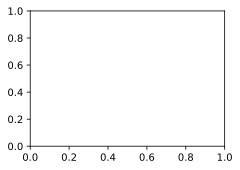

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net,train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## Network Using Blocks (VGG)
- CNN 설계에 대한 일종의 Template을 제시 
- 다수의 Transistor의 Logic Block을 이용하여 반도체를 설계하듯 
### VGG Block 
- 반복된 (Conv2D - ReLU)에 이어 MaxPool이 조합
### Architecture 
- 이러한 VGG Block의 다층 구조에 이어 FC Layer가 배치되는 구조

In [8]:
import torch
from torch import nn


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, 
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [14]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    
    return nn.Sequential(*conv_blks, nn.Flatten(), 
                         nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096,10))

conv_arch = ((1,64), (1,128), (2,256), (2,512), (2,512))

net = vgg(conv_arch)
X = torch.rand(size=(1,1,224,224))
for blk in net:
    X = blk(X)
    print(f'{blk.__class__.__name__} output shape: {X.shape}')

Sequential output shape: torch.Size([1, 64, 112, 112])
Sequential output shape: torch.Size([1, 128, 56, 56])
Sequential output shape: torch.Size([1, 256, 28, 28])
Sequential output shape: torch.Size([1, 512, 14, 14])
Sequential output shape: torch.Size([1, 512, 7, 7])
Flatten output shape: torch.Size([1, 25088])
Linear output shape: torch.Size([1, 4096])
ReLU output shape: torch.Size([1, 4096])
Dropout output shape: torch.Size([1, 4096])
Linear output shape: torch.Size([1, 4096])
ReLU output shape: torch.Size([1, 4096])
Dropout output shape: torch.Size([1, 4096])
Linear output shape: torch.Size([1, 10])


## Network in Network (NiN)
- LeNet / AlexNet / VGG의 Design 공통점 => 뒷단에 FC를 배치한다는 것
- LeNet 대비 AlexNet / VGG는 이 뒷단의 FC를 단순히 조금씩 확장한 것
- 완전히 다른 시도로 FC를 Network의 앞쪽에 배치하는 방식을 시도
  - 자칫 입력의 공간적 구조를 잃게 만들 수 있음
  - Pixel별로 MLP를 적용 (1 X 1 Conv)

### NiN Blocks


In [15]:
import torch 
from torch import nn
from d2l import torch as d2l

def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

In [16]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten())

## Networks with Parallel Concatenation (GoogLeNet)
- 다양한 Kernel Size를 조합 시도
- 독창적인 구조 Inception Block의 고안

### Inception Blocks
- 4개의 Parallel path로 구성
- 3 for conv. layer with different kernel size for each, 1, 3, 5
- 마지막으로 channel count를 바꾸기 위한 1 x 1 conv layer 
- 각 layer의 output channel count를 hyperparamter tuning point로 많이 활용 

## Batch Normalization
- Deep Network(예를 들어 100 Layer 이상의..)의 학습 효율을 높일 수 있는 방법
### Training Deep Networks
- 아직 이론적으로 덜 정립되었음
- elementwise scale parameter와 shift parameter => input과 shape이 같음
- 각 element를 mean으로 빼고 variance로 나눔 => layer의 출력의 치우침이나 발산되지 않도록 방지
### Batch Normalizatino Layers
- Fully Connected와 Convolution layer간에 구현 방식의 차이가 존재함.
#### Fully Connected Layers
- Affine Transformation의 출력에 대해 Batch Norm 적용
- Y = Activation(BatchNorm(LinearFunction(X)))
#### Convolution Layers
- 위치는 Conv 뒤 그리고 Activiation 앞으로 위 FC와 유사
- Output이 Multi Channel인 경우 각 Channel별로 Batch Norm이 이루어짐.
#### Batch Normalization in Prediciont
- Prediction
  - train 시 구한 moving mean 그리고 moving variance를 그대로 사용
- Training
  - 해당 minibatch의 mean과 variance 값을 이용하여 moving mean과 moving variance 값을 update (momentum 계수만큼 곱해서..)
  
  


In [1]:
import torch 
from torch import nn
from d2l import torch as d2l 


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    if not torch.is_grad_enabled():
        x_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2,4)
        if len(X.shape) == 2:
            mean = X.mean(dim = 0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            mean = X.mean(dim=(0,2,3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0,2,3), keepdim=True)
            
        X_hat = (X - mean) / torch.sqrt(var + eps)
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta
    return Y, moving_mean.data, moving_var.data

loss 0.259, train acc 0.904, test acc 0.873
39449.4 examples/sec on cuda:0


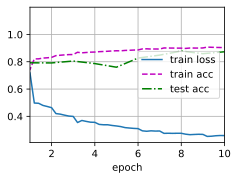

In [4]:
from torch import nn

net = nn.Sequential(
    nn.Conv2d(1,6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16 * 4 * 4, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84,10)) 


lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
    

### 논란
- Simpler Model이 더 Generalization에 유리하다는 이론적 기반이 부재
- Dropout 및 Weight Decay 역시 마찬가지 
- 논문에 batch norm이 효과적인 이유를 설명하는 과정에서의 오류
  - moving var과 moving mean에 의해 training 과정에서 발생되는 change를 internal covariate shift라 표현 -> 하지만 이는 잘못된 표현(정의상)
  - 특정 조건에서 직관적 설명을 허용하지만 더 근본적으로 왜 이러한 방식이 잘 동작하는지는 설명하지 못함
  
